<a href="https://colab.research.google.com/github/jsong55/Machine_Learning/blob/master/02_neural_network_classification_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# classification with tensorflow

### Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles
X,y = make_circles(n_samples,
          noise=0.03,
          random_state=42)

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


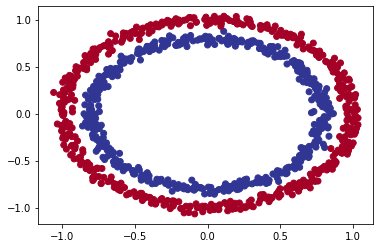

In [ ]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

### Steps in modelling

In [ ]:
import tensorflow as tf

In [ ]:

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.SGD(),
        metrics=["accuracy"])

model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 3ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.SGD(),
        metrics=["accuracy"])

model_2.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.9159 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7433 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7192 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.5060
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6975 - accuracy: 0.4920
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6971 - accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5050
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.4940
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4680
Epoch 11/

### Improving the model

In [ ]:
model_3 = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1)

])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"])

model_3.fit(X,y,epochs=100)

import numpy as np

In [ ]:
def plot_decision_boundary(model,X,y):
  x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
              np.linspace(y_min,y_max,100))
  
  x_in = np.c_[xx.ravel(),yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0])>1:
    print("multiclass classification")
  else:
    print("binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

binary classification


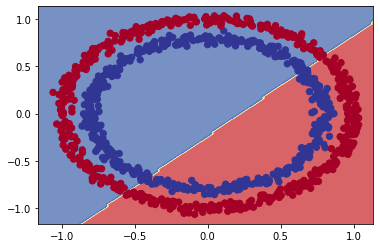

In [ ]:
plot_decision_boundary(model=model_3,X=X,y=y)

In [ ]:
# build nw with a non--linear activation function
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"]
)

history = model_5.fit(X,y,epochs = 200)

Epoch 1/200
32/32 [==============================] - 0s 1ms/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/200
32/32 [==============================] - 0s 1ms/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/200
32/32 [==============================] - 0s 1ms/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 3.9604 - accuracy: 0.4170
Epoch 7/200
32/32 [==============================] - 0s 1ms/step - loss: 3.8936 - accuracy: 0.4110
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 3.7818 - accuracy: 0.4140
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 3.7564 - accuracy: 0.4140
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 3.7547 - accuracy: 0.4150
Epoch 11/

In [ ]:
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_6.fit(X,y,epochs = 200)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 1.8602 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 1ms/step - loss: 1.2989 - accuracy: 0.5000
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 1.1709 - accuracy: 0.4930
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0865 - accuracy: 0.4340
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 1.0176 - accuracy: 0.4080
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9593 - accuracy: 0.4440
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.9133 - accuracy: 0.4520
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8755 - accuracy: 0.4670
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8491 - accuracy: 0.4690
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.8277 - accuracy: 0.4690
Epoch 11/

In [ ]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2852 - accuracy: 0.8360


[0.28521740436553955, 0.8360000252723694]

binary classification


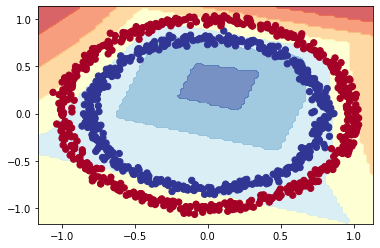

In [ ]:
plot_decision_boundary(model_6,X,y)

In [ ]:
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

history = model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5310
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.5060
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5100
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.4980
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5080
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5040
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5210
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5100
Epoch 11/

In [ ]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.9400


[0.38816210627555847, 0.9399999976158142]

binary classification


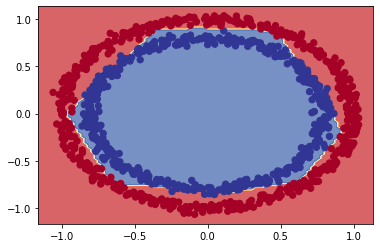

In [ ]:
plot_decision_boundary(model_7,X,y)

In [ ]:
# create a toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

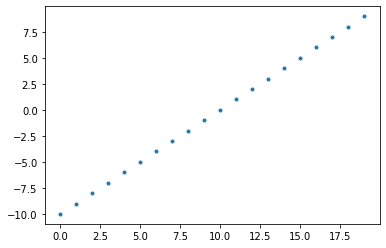

In [ ]:
plt.plot(A,'.')

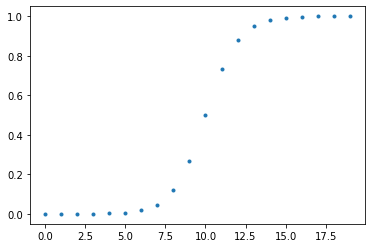

In [ ]:
# sigmoid = 1 / (1+exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# try sigmoid function
sigmoid(A)
plt.plot(sigmoid(A),'.')

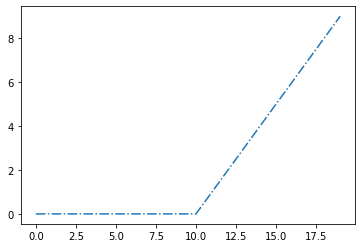

In [ ]:
# relu function
def relu(x):
  return tf.maximum(0,x)

# try relu function
relu(A)
plt.plot(relu(A),'-.')

In [ ]:
# create training and testing set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [ ]:
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        metrics=["accuracy"])

history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.4563
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.4600
Epoch 3/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6886 - accuracy: 0.5100
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.5450
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5612
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5350
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6672 - accuracy: 0.5537
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.5750
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6288
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6125 - accuracy: 0.6725
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1508 - accuracy: 0.9850


[0.15083986520767212, 0.9850000143051147]

binary classification
binary classification


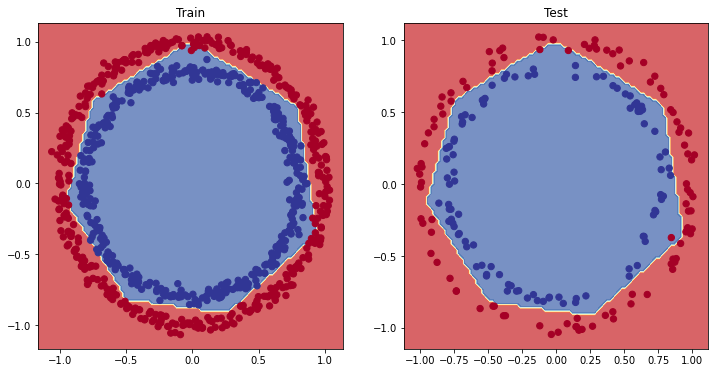

In [ ]:
# plot the decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X=X_test,y=y_test)

In [ ]:
# plot the loss
pd.DataFrame(history.history)

,loss,accuracy
0,0.705730,0.45625
1,0.693503,0.46000
2,0.688604,0.51000
3,0.685914,0.54500
4,0.681880,0.56125
5,0.676194,0.53500
6,0.667225,0.55375
7,0.656150,0.57500
8,0.641357,0.62875
9,0.612507,0.67250


Text(0.5, 1.0, 'Model 8 loss curves')

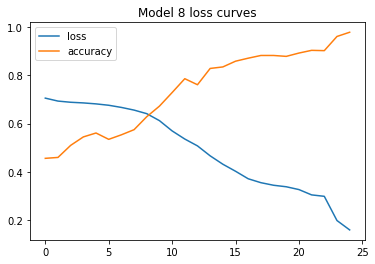

In [ ]:
# plot loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 8 loss curves")

## Find the best learning rate
* a learning rate **callback**
* a new model
* a modified loss curves plot

In [ ]:
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

history = model_9.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7280 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7269 - accuracy: 0.4925 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7257 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7244 - accuracy: 0.4938 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7231 - accuracy: 0.4938 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7218 - accuracy: 0.4938 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7202 - accuracy: 0.4875 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.4850 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

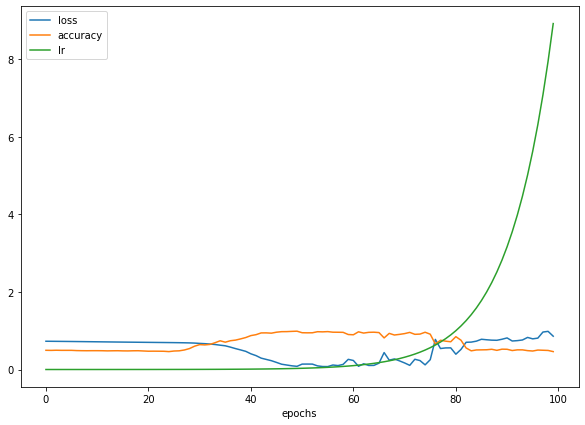

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

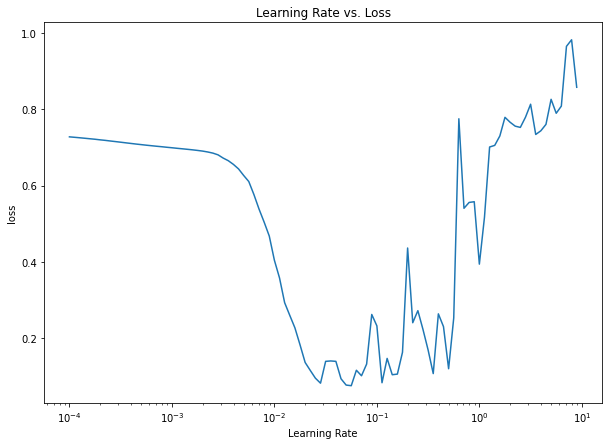

In [ ]:
lrs = 1e-4*(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("loss")
plt.title("Learning Rate vs. Loss")

In [ ]:
# try to a ideal learning rate
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(4,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
        metrics=["accuracy"])

history = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6850 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6694 - accuracy: 0.5738
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6850
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.7038
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.8100
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8813
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.9638
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2255 - accuracy: 0.9675
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1772 - accuracy: 0.9700
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1348 - accuracy: 0.9850
Epoch 11/20
25/25 [

In [ ]:
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f"model loss on the test set: {loss}")
print(f"model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9850
model loss on the test set: 0.05098169669508934
model accuracy on the test set: 98.50%


In [ ]:
# create confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_10.predict(X_test)

#create confusion matrix
confusion_matrix(y_test,tf.round(y_preds))

array([[98,  3],
       [ 0, 99]])

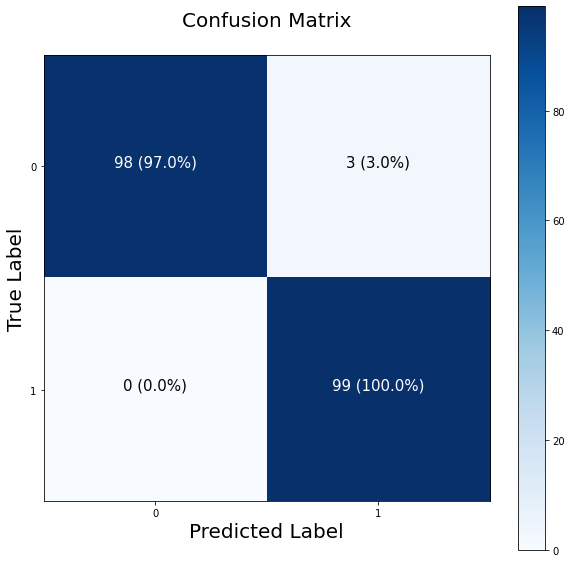

In [ ]:
import itertools
import numpy as np

figsize = (10,10)

cm = confusion_matrix(y_test,tf.round(y_preds))
cm_norm = cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
n_classes = cm.shape[0]

fig,ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm,cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) /2.

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i,f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
    horizontalalignment = "center",
    color = "white" if cm[i,j] > threshold else "black",
    size = 15)